In [ ]:
!pip install mlxtend

In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn import model_selection
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
style.use("ggplot")
%matplotlib inline

#### **Titanic Dataset**

In [ ]:
df = pd.read_csv('train_and_test2.csv')

In [ ]:
df.shape

(1309, 28)

In [ ]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [ ]:
def missing_cols(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    print(f'Columns with missing values > 0 \n{missing.sort_values()}')
missing_cols(df)

Columns with missing values > 0 
Embarked    2
dtype: int64


In [ ]:
# Remove two rows which have Embarked as missing
df.dropna(inplace=True)
# reseting indices
df.reset_index(drop=True,inplace=True)

In [ ]:
y = df['2urvived']
df.drop(['2urvived'],axis=1, inplace=True)

In [ ]:
# remove the zero columns
cols = []
for c in df.columns:
  if c.startswith('zero') or c == 'Passengerid':
    continue
  cols.append(c)
print(cols)

['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked']


In [ ]:
df = df[cols]
df.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
0,22.0,7.2500,0,1,0,3,2.0
1,38.0,71.2833,1,1,0,1,0.0
2,26.0,7.9250,1,0,0,3,2.0
3,35.0,53.1000,1,1,0,1,2.0
4,35.0,8.0500,0,0,0,3,2.0


In [ ]:
scaler = preprocessing.StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
0,-0.580261,-0.501839,-0.741900,0.480272,-0.445407,0.840447,0.622940
1,0.662297,0.736023,1.347891,0.480272,-0.445407,-1.550118,-1.833116
2,-0.269621,-0.488790,1.347891,-0.479537,-0.445407,0.840447,0.622940
3,0.429318,0.384512,1.347891,0.480272,-0.445407,-1.550118,0.622940
4,0.429318,-0.486373,-0.741900,-0.479537,-0.445407,0.840447,0.622940


In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(df, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(1045, 7) (262, 7)


In [ ]:
model_specs = [
    {
        'kernel': 'linear'
    },
    {
        'kernel': 'poly',
        'degree': 2
    },
    {
        'kernel': 'poly',
        'degree': 3
    },
    {
        'kernel': 'poly',
        'degree': 5
    },
    {
        'kernel': 'rbf'
    },
    {
        'kernel': 'sigmoid'
    }
]

In [ ]:
cols = ['kernel', 'degree', 'Accuracy']
models = []
model_perf = []
for model_spec in model_specs:
  m_perf = []
  m_perf.append(model_spec['kernel'])
  if model_spec['kernel'] == 'poly':
    m_perf.append(model_spec['degree'])
    classifier = SVC(kernel='poly', degree=model_spec['degree'], random_state=42)
  else:
    m_perf.append(None)
    classifier = SVC(kernel=model_spec['kernel'], random_state=42)

  classifier.fit(x_train, y_train)
  y_predict = classifier.predict(x_test)
  acc = accuracy_score(y_test, y_predict)

  m_perf.append(round(acc*100, 2))
  model_perf.append(m_perf)
  models.append(classifier)

In [ ]:
model_perf = pd.DataFrame(model_perf, columns=cols)
model_perf

,kernel,degree,Accuracy
0,linear,NaN,76.72
1,poly,2.0,75.19
2,poly,3.0,76.34
3,poly,5.0,75.19
4,rbf,NaN,78.24
5,sigmoid,NaN,72.14


In [ ]:
# # Take only two features from the dataset and train the models with the same
# # parameters features = ['Sex', 'Age']
col1 = 'Age'
col2 = 'Fare'
X_data_ = df[[col1, col2]]
y_data_ = y

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_data_, y_data_, test_size=0.2) 

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [ ]:
models = []
for model_spec in model_specs:
  if model_spec['kernel'] == 'linear':
    classifier = SVC(kernel='linear', C=0.8, random_state=42)
  elif model_spec['kernel'] == 'poly':
    classifier = SVC(kernel='poly', degree=model_spec['degree'], random_state=42)
  else:
    classifier = SVC(kernel=model_spec['kernel'], random_state=42)

  classifier.fit(X_train, y_train)
  y_predict = classifier.predict(X_test)

  models.append(classifier)

In [ ]:
xx, yy = make_meshgrid(X_data_[col1], X_data_[col2])
titles = (
    'Linear Kernel',
    'Polynomial Kernel (Degree=2)',
    'Polynomial Kernel (Degree=3)',
    'Polynomial Kernel (Degree=5)',
    'RBF kernel',
    'Sigmoid Kernel'
)

In [ ]:
Z = []
for model in models:
  z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  z = z.reshape(xx.shape)
  Z.append(z)

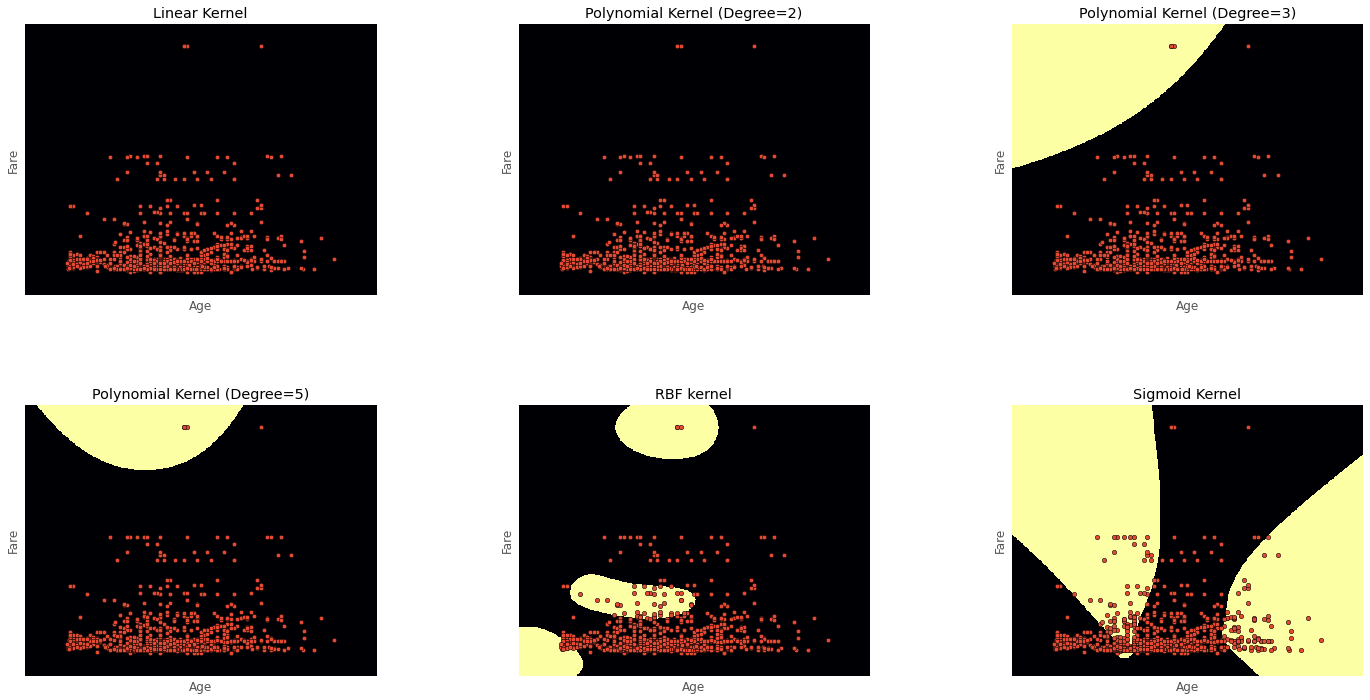

In [ ]:
fig, sub = plt.subplots(2, 3)
fig.set_figheight(12)
fig.set_figwidth(24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, z, ax in zip(models, titles, Z, sub.flatten()):
  ax.pcolormesh(xx, yy, z, cmap=plt.cm.inferno)
  ax.scatter(X_data_[col1], X_data_[col2],
              cmap=plt.cm.inferno, s=20, edgecolors='k')
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xlabel(col1)
  ax.set_ylabel(col2)
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(title)
  # plt.show()

plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def Optimum_C(cmin, cmax, X, y, max_iter = 20):
  c_l = cmin
  c_r = cmax

  max_par = {'acc': 0, 'c': cmin}
  incr = True
  iter = 1
  plot_data = []

  # Initialisation
  clf = SVC(kernel='rbf', C=cmin, gamma=0.5, random_state=42)
  clf.fit(X_train, y_train)
  scores = cross_val_score(clf, X, y, cv=3)
  cur_acc = scores.mean()
  plot_data.append([cmin, round(cur_acc*100, 2)])

  print('Iteration:', 0, 'c = ', cmin, 'acc: ', round(cur_acc*100, 2))

  while c_l <= c_r:
    if iter > max_iter:
      break
    
    c_mid = (c_l + c_r)/2

    clf = SVC(kernel='rbf', C=c_mid, gamma=0.5, random_state=42)

    scores = cross_val_score(clf, X, y, cv=3)

    print(f'Iteration: {iter}, c = {c_mid}, acc: {round(scores.mean()*100, 2)}')

    if scores.mean() > max_par['acc']:
      max_par['acc'] = scores.mean()
      max_par['c'] = c_mid

    if scores.mean() >= cur_acc:
      if incr:
        c_l = c_mid
      else:
        c_r = c_mid

    else:
      if incr:
        c_r = c_mid
      else:
        c_l = c_mid
      incr = not incr
    plot_data.append([c_mid, round(scores.mean()*100, 2)])

    cur_acc = scores.mean()
    iter += 1

  return max_par['c'], np.array(plot_data)

In [ ]:
c, plot_data = Optimum_C(2**-4, 2**4, df, y)

Iteration: 0 c =  0.0625 acc:  73.99
Iteration: 1, c = 8.03125, acc: 74.82
Iteration: 2, c = 12.015625, acc: 74.75
Iteration: 3, c = 10.0234375, acc: 74.52
Iteration: 4, c = 11.01953125, acc: 74.59
Iteration: 5, c = 11.517578125, acc: 74.59
Iteration: 6, c = 11.7666015625, acc: 74.75
Iteration: 7, c = 11.89111328125, acc: 74.75
Iteration: 8, c = 11.953369140625, acc: 74.75
Iteration: 9, c = 11.9844970703125, acc: 74.75
Iteration: 10, c = 12.00006103515625, acc: 74.75
Iteration: 11, c = 12.007843017578125, acc: 74.75
Iteration: 12, c = 12.011734008789062, acc: 74.75
Iteration: 13, c = 12.013679504394531, acc: 74.75
Iteration: 14, c = 12.014652252197266, acc: 74.75
Iteration: 15, c = 12.015138626098633, acc: 74.75
Iteration: 16, c = 12.015381813049316, acc: 74.75
Iteration: 17, c = 12.015503406524658, acc: 74.75
Iteration: 18, c = 12.015564203262329, acc: 74.75
Iteration: 19, c = 12.015594601631165, acc: 74.75
Iteration: 20, c = 12.015609800815582, acc: 74.75


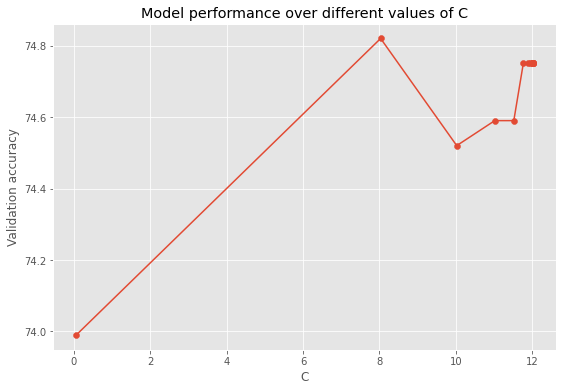

In [ ]:
plot_data = np.array(sorted(plot_data, key=lambda x: x[0]))
plt.figure(figsize=(9,6))
plt.title('Model performance over different values of C')
plt.xlabel('C')
plt.ylabel('Validation accuracy')
plt.plot(plot_data[:,0], plot_data[:,1])
plt.scatter(plot_data[:,0], plot_data[:,1])
plt.show()

In [ ]:
def Optimum_Gamma(gmin, gmax, c ,X, y, max_iter = 20):
  g_l = gmin
  g_r = gmax

  max_par = {'acc': 0, 'g': gmin}
  incr = True
  iter = 1
  plot_data = []

  # Initialisation
  clf = SVC(kernel='rbf', C=c, gamma=gmin, random_state=42)
  clf.fit(X_train, y_train)
  scores = cross_val_score(clf, X, y, cv=3)
  cur_acc = scores.mean()
  print(f'Iteration: {0}, gamma = {gmin}, acc: {round(scores.mean()*100, 2)}')
  plot_data.append([gmin, round(cur_acc*100, 2)])

  while g_l <= g_r:
    if iter > max_iter:
      break
    
    g_mid = g_l + (g_r - g_l)/2

    clf = SVC(kernel='rbf', C=c, gamma=g_mid, random_state=42)

    scores = cross_val_score(clf, X, y, cv=3)

    print(f'Iteration: {iter}, gamma = {g_mid}, acc: {round(scores.mean()*100, 2)}')

    if scores.mean() > max_par['acc']:
      max_par['acc'] = scores.mean()
      max_par['g'] = g_mid

    if scores.mean() >= cur_acc:
      if incr:
        g_l = g_mid
      else:
        g_r = g_mid

    else:
      if incr:
        g_r = g_mid
      else:
        g_l = g_mid
      incr = not incr

    # test_score = clf.score(X_test, y_test)
    # plot_data.append([c_mid, scores.mean(), test_score])
    plot_data.append([g_mid, round(scores.mean()*100, 2)])

    cur_acc = scores.mean()
    iter += 1

  return max_par['g'], np.array(plot_data)

In [ ]:
g, plot_data = Optimum_Gamma(2**-3.5, 2**-2,c, df, y)

Iteration: 0 , gamma = 0.08838834764831845, acc: 77.73
Iteration: 1 gamma =  0.16919417382415924 acc:  76.43
Iteration: 2 gamma =  0.12879126073623884 acc:  77.65
Iteration: 3 gamma =  0.10858980419227865 acc:  77.65
Iteration: 4 gamma =  0.11869053246425874 acc:  77.5
Iteration: 5 gamma =  0.1136401683282687 acc:  77.65
Iteration: 6 gamma =  0.11111498626027368 acc:  77.57
Iteration: 7 gamma =  0.1123775772942712 acc:  77.65
Iteration: 8 gamma =  0.11300887281126995 acc:  77.65
Iteration: 9 gamma =  0.11332452056976933 acc:  77.65
Iteration: 10 gamma =  0.11348234444901902 acc:  77.65
Iteration: 11 gamma =  0.11356125638864387 acc:  77.65
Iteration: 12 gamma =  0.11360071235845629 acc:  77.65
Iteration: 13 gamma =  0.1136204403433625 acc:  77.65
Iteration: 14 gamma =  0.1136303043358156 acc:  77.65
Iteration: 15 gamma =  0.11363523633204214 acc:  77.65
Iteration: 16 gamma =  0.11363770233015542 acc:  77.65
Iteration: 17 gamma =  0.11363893532921207 acc:  77.65
Iteration: 18 gamma =  0

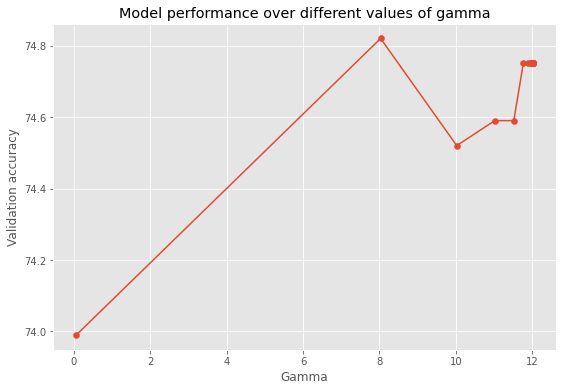

In [ ]:
plot_data = np.array(sorted(plot_data, key=lambda x: x[0]))
plt.figure(figsize=(9,6))
plt.title('Model performance over different values of gamma')
plt.xlabel('Gamma')
plt.ylabel('Validation accuracy')
plt.plot(plot_data[:,0], plot_data[:,1])
plt.scatter(plot_data[:,0], plot_data[:,1])
plt.show()

#### **Forest Cover Type Dataset**

In [ ]:
df_forest = pd.read_csv('covtype.csv')
df_forest.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
df_forest.shape

(581012, 55)

In [ ]:
df_forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [ ]:
X = df_forest.copy()

In [ ]:
# Let's see if missing values are available
missing_cols(X)

Columns with missing values > 0 
Series([], dtype: int64)


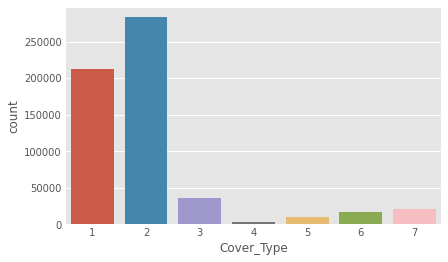

In [ ]:
ax = sns.countplot(x="Cover_Type", data=X)

##### We have an imbalanced dataset

In [ ]:
X["Distance_To_Hydrology"] = ( (X["Horizontal_Distance_To_Hydrology"] ** 2) + (X["Vertical_Distance_To_Hydrology"] ** 2) ) ** (0.5)

In [ ]:
y = X['Cover_Type']
X.drop(["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology", "Cover_Type"], axis=1, inplace=True)

In [ ]:
#We use pandas's 'get_dummies()' method
X = pd.get_dummies(X)

In [ ]:
numer = X[["Elevation","Aspect","Slope","Horizontal_Distance_To_Roadways","Hillshade_9am",
           "Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Distance_To_Hydrology"]]

In [ ]:
cater = X[["Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Wilderness_Area4",
           "Soil_Type1","Soil_Type2","Soil_Type3","Soil_Type4","Soil_Type5","Soil_Type6",
           "Soil_Type7","Soil_Type8","Soil_Type9","Soil_Type10","Soil_Type11",
           "Soil_Type12","Soil_Type13","Soil_Type14","Soil_Type15","Soil_Type16",
           "Soil_Type17","Soil_Type18","Soil_Type19","Soil_Type20","Soil_Type21",
           "Soil_Type22","Soil_Type23","Soil_Type24","Soil_Type25","Soil_Type26",
           "Soil_Type27","Soil_Type28","Soil_Type29","Soil_Type30","Soil_Type31",
           "Soil_Type32","Soil_Type33","Soil_Type34","Soil_Type35","Soil_Type36",
           "Soil_Type37","Soil_Type38","Soil_Type39","Soil_Type40"]]

In [ ]:
#Initialize our scaler
scaler = preprocessing.StandardScaler()

In [ ]:
#Scale each column in numer
numer = pd.DataFrame(scaler.fit_transform(numer))

In [ ]:
numer.columns = ["Elevation_Scaled","Aspect_Scaled","Slope_Scaled","Horizontal_Distance_To_Roadways_Scaled","Hillshade_9am_Scaled","Hillshade_Noon_Scaled","Hillshade_3pm_Scaled","Horizontal_Distance_To_Fire_Points_Scaled","Distance_To_Hydrology_Scaled"]

In [ ]:
X = pd.concat([numer, cater], axis=1, join='inner')

In [ ]:
X.head()

,Elevation_Scaled,Aspect_Scaled,Slope_Scaled,Horizontal_Distance_To_Roadways_Scaled,Hillshade_9am_Scaled,Hillshade_Noon_Scaled,Hillshade_3pm_Scaled,Horizontal_Distance_To_Fire_Points_Scaled,Distance_To_Hydrology_Scaled,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-1.297805,-0.935157,-1.482820,-1.180146,0.330743,0.439143,0.142960,3.246283,-0.083233,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,-1.319235,-0.890480,-1.616363,-1.257106,0.293388,0.590899,0.221342,3.205504,-0.294777,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,-0.554907,-0.148836,-0.681563,0.532212,0.816364,0.742654,-0.196691,3.126965,-0.001362,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.622768,-0.005869,0.520322,0.474492,0.965786,0.742654,-0.536343,3.194931,-0.031466,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-1.301377,-0.988770,-1.616363,-1.256464,0.293388,0.540313,0.195215,3.165479,-0.566983,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=999)
X_train.shape, X_test.shape

((348607, 53), (232405, 53))

In [ ]:
%%time
# one-vs-rest
clf = LinearSVC(multi_class="ovr", C=2, dual=False)
feature_map_nystroem = Nystroem(gamma=0.5, random_state=1, n_components=300)
X_transformed = feature_map_nystroem.fit_transform(X_train)

CPU times: user 10.8 s, sys: 692 ms, total: 11.5 s
Wall time: 7.57 s


In [ ]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(X_transformed, Y_train, test_size=0.2, random_state=999)
x_train.shape, x_val.shape

((278885, 300), (69722, 300))

In [ ]:
%%time
clf.fit(x_train, y_train)
y_pred = clf.predict(x_val)
svc_accuracy = round(accuracy_score(y_val, y_pred)*100, 2)
print(f'The accuracy is : {svc_accuracy}')

The accuracy is : 72.55
CPU times: user 3.33 s, sys: 1.72 s, total: 5.04 s
Wall time: 2min 3s


In [ ]:
# confusion matrix for ovr
cf = confusion_matrix(y_val, y_pred)

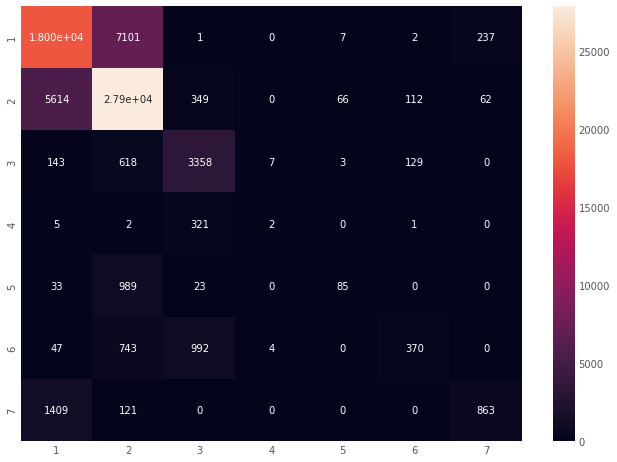

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cf, annot=True, fmt='.4g', xticklabels=np.arange(1,8), yticklabels=np.arange(1,8))

In [ ]:
# one-vs-one SVM
%%time
clf = OneVsOneClassifier(LinearSVC(random_state=0, C=2, dual=False), n_jobs=-1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_val)
svc_accuracy = round(accuracy_score(y_val, y_pred)*100, 2)
print(f'The accuracy is : {svc_accuracy}')

The accuracy is : 72.55
CPU times: user 3.32 s, sys: 1.44 s, total: 4.76 s
Wall time: 2min


In [ ]:
# confusion matrix for ovr
cf = confusion_matrix(y_val, y_pred)

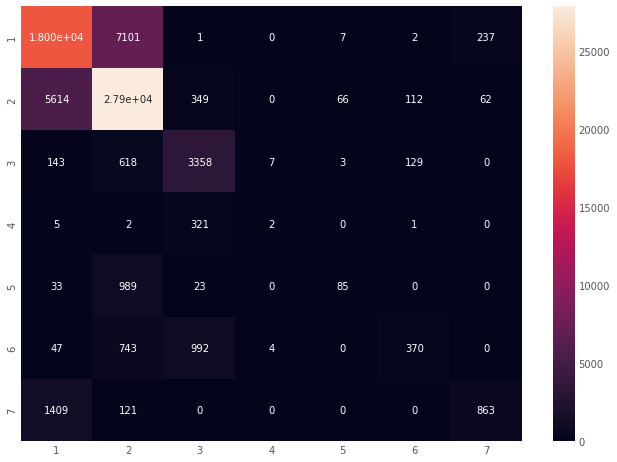

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cf, annot=True, fmt='.4g', xticklabels=np.arange(1,8), yticklabels=np.arange(1,8))